In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Open saved file and preview again
df = pd.read_csv("Data/insurance - insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

# Q1

Null Hypothesis (H0): Smokers have higher insurances chargers than non smokers

Alternate Hypothesis: (Ha): Smokers do NOT have higher insurances chargers than non smokers


In [3]:
df_1 = df[['smoker', 'charges']]
df_1

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350
1336,no,2007.94500


In [4]:
#created df of discounted and non discounted orders
df_1['Smoker'] = df_1['smoker'].str.contains('yes')
df_1['Smoker']

C:\Users\robo1\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: Smoker, Length: 1338, dtype: bool

In [5]:
#parses through and findes how many orders are and arenot discounted and displays them
non_smoker_df = df_1.loc[df_1['Smoker']==False, ['charges', 'Smoker']]
smoker_df = df_1.loc[df_1['Smoker']==True, ['charges', 'Smoker']]

print(f"There are {len(smoker_df)} smokers")
print(f"There are {len(non_smoker_df)} non smokers")

There are 274 smokers
There are 1064 non smokers


In [6]:
#merges back the 2 dataframes to be used in plots
plot_df = pd.concat([non_smoker_df, smoker_df], axis = 0)
plot_df

,charges,Smoker
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
5,3756.62160,False
...,...,...
1313,36397.57600,True
1314,18765.87545,True
1321,28101.33305,True
1323,43896.37630,True


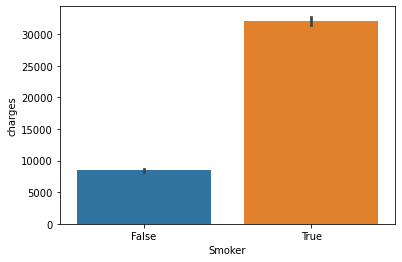

In [7]:
#creates and displays a barplotshowingaverage quantity of orders with or without discounts
ax = sns.barplot(data=plot_df, x='Smoker', y='charges', ci=68)

In [8]:
#creates new groups for each side
smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']
display(smoker_group.head(),non_smoker_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [9]:
#totals outliers for discounted group
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
print(f"There are {smoker_outliers.sum()} outliers in the smoker group out of {len(smoker_outliers)}")

There are 0 outliers in the smoker group out of 274


In [10]:
#totals outliers for discounted group
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3
print(f"There are {non_smoker_outliers.sum()} outliers in the smoker group out of {len(non_smoker_outliers)}")

There are 24 outliers in the smoker group out of 1064


In [11]:
#creates filter for outliers
non_smoker_df.loc[~non_smoker_outliers]

,charges,Smoker
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
5,3756.62160,False
...,...,...
1332,11411.68500,False
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False


In [12]:
#applys filter to group to remove outliers

non_smoker_group = non_smoker_group.loc[~non_smoker_outliers]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [13]:
#tests for equal varience
results = stats.levene(smoker_group, non_smoker_group)
print(results)
print(results.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


In [14]:
# re tests pvalue using Mann-Whitney U test
MW_results = stats.mannwhitneyu(smoker_group,non_smoker_group)
print(MW_results)
MW_results.pvalue < .05

MannwhitneyuResult(statistic=280502.0, pvalue=1.0913949503729143e-134)


True

the p-value is < alpha, therefore We reject the null hypothesis. There is a significant difference between charges for smokers and none smokers



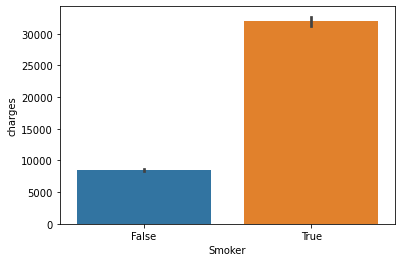

In [15]:
#creates and displays a barplotshowingaverage quantity of orders with or without discounts
ax = sns.barplot(data=plot_df, x='Smoker', y='charges', ci=68)

# Q2

Null Hypothesis (H0): men are more likely to smoke than women

Alternate Hypothesis: (Ha): men are NOT more likely to smoke than women

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


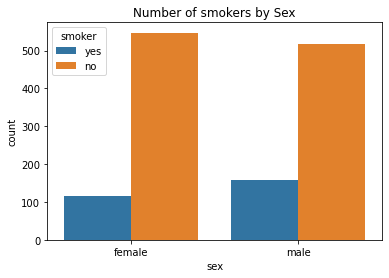

In [17]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers by Sex");

In [18]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [19]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [20]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Since our p < .05, we reject the null hypothesis that men are more likely to smoke than women.

# Q3

Null Hypothesis (H0): regions  have different charges on average

Alternate Hypothesis: (Ha): regions  do NOT have different charges on average

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


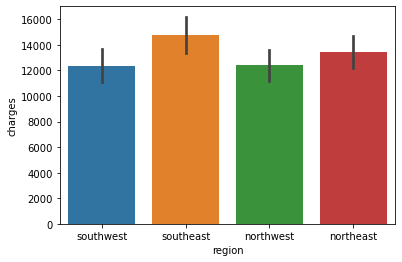

In [22]:
sns.barplot(data=df, x='region',y='charges');

In [23]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [24]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [25]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [26]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [27]:
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

values = df['charges']
labels = df['region']

In [29]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


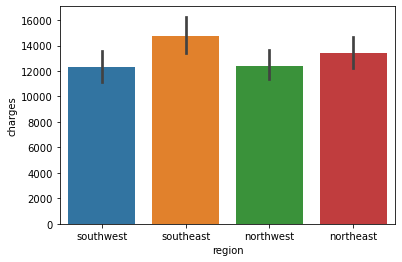

In [30]:
sns.barplot(data=df, x='region',y='charges');

The southeast seems to be the only region that we can reject the null hypothesis for.